Use delimiters to clearly indicate distinct parts of the input

SYSTEM

You will be provided with a thesis abstract and a suggested title for it. The thesis title should give the reader a good idea of the topic of the thesis but should also be eye-catching. If the title does not meet these criteria, suggest 5 alternatives.

USER
Abstract: insert abstract here
Title: insert title here



In [5]:
"P1: You will be provided with a verb in Moroccan Darija language, and your task is to translate it into English."
#def p1_translate_(verb):
#    completion = client.chat.completions.create(
#        model="gpt-3.5-turbo",
#        messages = [
#            {
#                "role": "system",
#                "content": "غادي نعطيك واحد الفعل بالدارجة المغربية، والمهمة ديالك هي تترجمو لنجليزية."
#            },
#            {
#                "role": "user", 
#                "content": f"{verb}"
#            }
#        ],
#        temperature=0
#    )
#    return completion.choices[0].message.content
#
#def eng_p1_translate_(verb):
#    completion = client.chat.completions.create(
#        model="gpt-3.5-turbo",
#        messages = [
#            {
#                "role": "system",
#                "content": "You will be provided with a verb in Moroccan Darija language, and your task is to translate it into English."
#            },
#            {
#                "role": "user", 
#                "content": f"{verb}"
#            }
#                ],
#        temperature=0
#    )
#    return completion.choices[0].message.content
#def p2_translate_(verb):
#    completion = client.chat.completions.create(
#        model="gpt-3.5-turbo",
#        messages = [
#            {
#                "role": "system",
#                "content": "غادي نعطيك واحد الفعل بالدارجة المغربية، والمهمة ديالك هي تترجمو لفعل انجليزي مجرد المصدر."
#            },
#            {
#                "role": "user", 
#                "content": f"{verb}"
#            }
#        ],
#        temperature=0
#    )
#    return completion.choices[0].message.content
#


#def eng_p2_translate_(verb):
#    completion = client.chat.completions.create(
#        model="gpt-3.5-turbo",
#        messages = [
#            {
#                "role": "system",
#                "content": "You will be provided with a verb in Moroccan Darija language, and your task is to translate it to a bare-infinitive English verb."
#            },
#            {
#                "role": "user", 
#                "content": f"{verb}"
#            }
#                ],
#        temperature=0
#    )
#    return completion.choices[0].message.content


'P1: You will be provided with a verb in Moroccan Darija language, and your task is to translate it into English.'

In [9]:
from openai import OpenAI
import pandas as pd
df = pd.read_csv('verbs.csv')
client = OpenAI()

df = df.head(10)

def p1_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {"role": "system", "content": 
                "ترجم الفعل المعطي بالدارجة المغربية لفعل انجليزي مجرد المصدر.\n" +
                "الترجمة خص يكون فيها غير جذر الفعل المترجم بلا تفسيرات."
             },
            {"role": "user", "content": f"الفعل: {verb}"}
        ],
        temperature=0
    )
    return completion.choices[0].message.content
def eng_p1_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {"role": "system", "content": 
             "Translate the provided Moroccan Darija dialect verb into a bare-infinitive English verb.\n" + 
             "The translation must contain only the lemma of the translated verb with no explanations."},
            {"role": "user", "content": f"Verb: {verb}"},
        ],
        temperature=0
    )
    return completion.choices[0].message.content


In [10]:
dataset = df.copy()
columns_to_delete = ['n2', 'n3', 'n4', 'n5', 'n6']
dataset.drop(columns=columns_to_delete, inplace=True)

dataset['p1_transl'] = dataset['darija_ar'].apply(p1_translate_)
dataset['eng_p1_transl'] = dataset['darija_ar'].apply(eng_p1_translate_)

In [12]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

eng = dataset['eng']
eng = [verb.replace(" ", "_") for verb in eng]
p1_transl = dataset['p1_transl']
eng_p1_transl = dataset['eng_p1_transl']
p1_transl = [verb.replace(" ", "_") for verb in p1_transl]
eng_p1_transl = [verb.replace(" ", "_") for verb in eng_p1_transl]

def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""

    synsets1 = wn.synsets(word1, pos=wn.VERB)
    synsets2 = wn.synsets(word2, pos=wn.VERB)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score

def evaluate_pairs(transl,threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(transl)):
        word1, word2 = transl[i], eng[i]
        similarity = max_path_similarity(word1, word2)
        results.append((word1, word2, similarity, similarity >= threshold))
    return results



results_p1 = evaluate_pairs(p1_transl)
results_eng_p1 = evaluate_pairs(eng_p1_transl)


dataset['similariy_p1'] = [item[2] for item in results_p1]
dataset['similarity_eng_p1'] = [item[2] for item in results_eng_p1]


p1_s = dataset['similariy_p1']
ep1_s = dataset['similarity_eng_p1']
p1= dataset['similariy_p1'].mean()
ep1= dataset['similarity_eng_p1'].mean()


print(f'Mean value of similarities in the first darija prompt is: {p1}')
print(f'Mean value of similarities in the first english prompt is: {ep1}')
dataset.describe()

Mean value of similarities in the first darija prompt is: 0.825
Mean value of similarities in the first english prompt is: 0.625


,similariy_p1,similarity_eng_p1
count,10.000000,10.000000
mean,0.825000,0.625000
std,0.373609,0.489473
min,0.000000,0.000000
25%,1.000000,0.062500
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


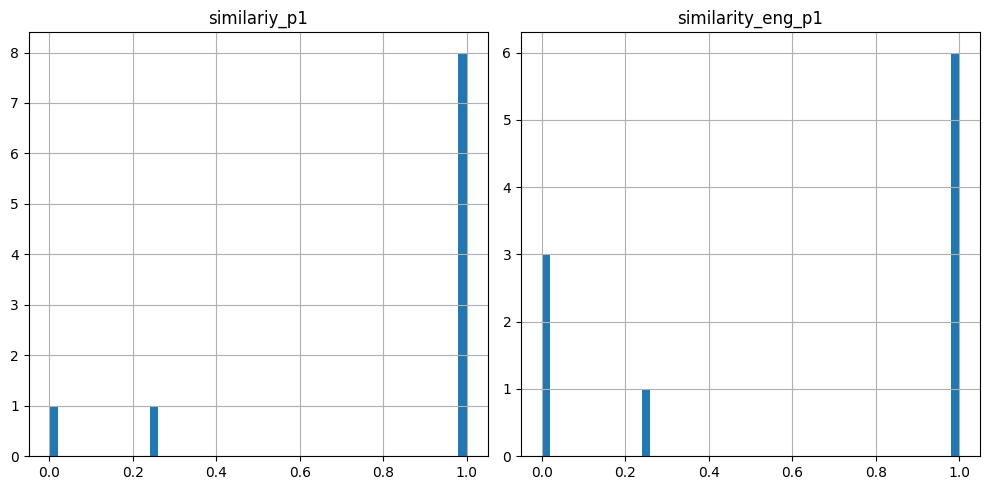

In [13]:
import matplotlib.pyplot as plt

dataset.hist(bins=50, figsize=(10,5))
plt.tight_layout()
plt.grid(True)
plt.show()

In [14]:
print(dataset)

      n1 darija_ar         eng   p1_transl eng_p1_transl  similariy_p1  \
0    kla       كلا         eat         Eat           eat          1.00   
1   chrb       شرب       drink       drink      to drink          1.00   
2  dkhel       دخل       enter       Enter         enter          1.00   
3   khrj       خرج      go out      go out     to go out          1.00   
4   fhem       فهم  understand  Understand    understand          1.00   
5   chr7       شرح     explain     explain    to explain          1.00   
6    9ra       قرا       learn        read          read          1.00   
7   9rra      قرّا       teach        read          read          0.25   
8    sm3       سمع        hear     to hear          hear          0.00   
9   chaf       شاف         see         See           see          1.00   

   similarity_eng_p1  
0               1.00  
1               0.00  
2               1.00  
3               0.00  
4               1.00  
5               0.00  
6               1.00  
7